In [1]:
import pandas as pd
import numpy as np
from utils.connect import GetQuery, GetPrices
from utils.optimizer import GainyOptimizer
from utils.portfolio import ReturnPortfolio
from tqdm import tqdm

In [43]:
ticker_list = ['SH', 'EFZ', 'SJB', 'SVOL', 'SGOL']

- SH - ProShares Short S&P500 (SH)
- EFZ - ProShares Short MSCI EAFE (EFZ)
- SJB - Proshares Short High Yield (SJB)
- SVOL - Simplify Volatility Premium ETF (SVOL)
- SGOL - abrdn Physical Gold Shares ETF (SGOL)

In [44]:
# Get Prices
prices = GetPrices(ticker_list, "2015-01-01", "2022-12-20")
prices

,EFZ,SGOL,SH,SJB,SVOL
date,,,,,
2015-01-02,34.0254,11.632,42.3935,27.4245,NaN
2015-01-05,34.8305,11.810,43.0935,27.7775,NaN
2015-01-06,35.2232,11.939,43.5599,27.8559,NaN
2015-01-07,34.8500,11.869,42.9767,27.6794,NaN
2015-01-08,34.3593,11.820,42.2382,27.3951,NaN
...,...,...,...,...,...
2022-12-14,19.4500,17.300,15.4200,18.6400,22.28
2022-12-15,19.9800,17.020,15.8200,18.7200,21.98
2022-12-16,20.1500,17.180,16.0100,18.8200,21.96


In [45]:
# Back test optimization
tradable = pd.read_csv("./Instruments List_PROD_NOV2022.csv").Symbol
set(ticker_list) - set(tradable)

set()

**NOTE DIFFERENT PARAMETERS HS HI**

In [46]:
params = {'bounds': (0.01, 0.3), 'penalties': {'hs': 0.5, 'hi': 0, 'b': 0.05}}

In [47]:
start_date = '2015-01-01'
end_date = '2022-12-20'
rebalance_dates = pd.date_range(start_date,end_date, freq='BM').strftime("%Y-%m-%d").tolist()


In [48]:
weights = pd.DataFrame()
for d in tqdm(rebalance_dates):
    optimizer = GainyOptimizer(ticker_list, d, benchmark='SPY', lookback=9)
    opt_res = optimizer.OptimizePortfolioRiskBudget(params=params)
    weights = pd.concat([weights, pd.DataFrame(opt_res, index=[d])])
    

  0%|                                                    | 0/95 [00:00<?, ?it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

  1%|▍                                           | 1/95 [00:00<00:58,  1.61it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

  2%|▉                                           | 2/95 [00:01<00:59,  1.57it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

  3%|█▍                                          | 3/95 [00:01<00:59,  1.55it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

  4%|█▊                                          | 4/95 [00:02<00:57,  1.59it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

  5%|██▎                                         | 5/95 [00:

 46%|███████████████████▉                       | 44/95 [00:34<00:41,  1.24it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 47%|████████████████████▎                      | 45/95 [00:35<00:38,  1.28it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 48%|████████████████████▊                      | 46/95 [00:35<00:35,  1.37it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 49%|█████████████████████▎                     | 47/95 [00:36<00:33,  1.41it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 51%|█████████████████████▋                     | 48/95 [00:37<00:32,  1.44it/s]WARNING:root:
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 52%|██████████████████████▏                    | 49/95 [00:

We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

 88%|██████████████████████████████████████     | 84/95 [01:01<00:06,  1.58it/s]WARNING:root:
The following tickers have less than 80% of price observations: ['SVOL']
They will be dropped
We do not support the following tickers ['SVOL'].
They will be dropped from the optimization

100%|███████████████████████████████████████████| 95/95 [01:09<00:00,  1.37it/s]


In [49]:
weights

,SGOL,SJB,EFZ,SH,SVOL
2015-01-30,0.300000,0.290724,0.215487,0.193788,NaN
2015-02-27,0.300000,0.292161,0.211953,0.195886,NaN
2015-03-31,0.300000,0.293084,0.209752,0.197163,NaN
2015-04-30,0.300000,0.291778,0.211513,0.196709,NaN
2015-05-29,0.300000,0.294376,0.207813,0.197811,NaN
...,...,...,...,...,...
2022-07-29,0.229050,0.196087,0.150909,0.123955,0.3
2022-08-31,0.233767,0.193929,0.149803,0.122501,0.3
2022-09-30,0.238674,0.191367,0.147987,0.121972,0.3
2022-10-31,0.245745,0.190246,0.143666,0.120344,0.3


<AxesSubplot:xlabel='date'>

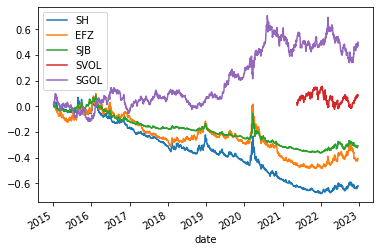

In [50]:
rets = prices.pct_change()[ticker_list]
((1+rets).cumprod() - 1).plot()

In [51]:
w = weights
w.index = pd.to_datetime(w.index)

In [52]:
pr = ReturnPortfolio(rets, w)

<AxesSubplot:>

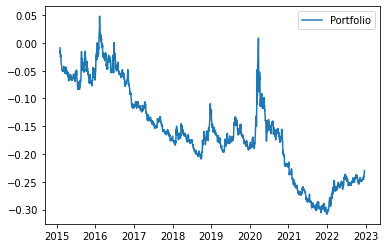

In [53]:
((1+pr).cumprod()-1).plot()

<AxesSubplot:>

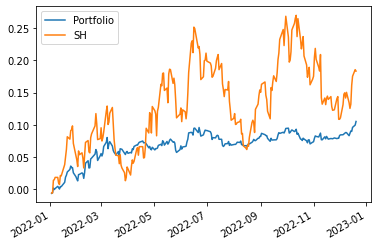

In [54]:
test = pd.merge(pr, rets['SH'], left_index=True, right_index=True)
((1+test.loc["2022"]).cumprod()-1).plot()

In [55]:
(test.mean()*250 )/ (test.std()*(250**0.5))

Portfolio   -0.295605
SH          -0.571307
dtype: float64

In [56]:
test.mean()*250 

Portfolio   -0.028304
SH          -0.107292
dtype: float64

In [57]:
test.std()*(250**0.5)

Portfolio    0.09575
SH           0.18780
dtype: float64

In [58]:
bm = GetPrices('SPY',"2015-01-01", "2022-12-20").pct_change()
test = test.merge(bm, left_index=True, right_index=True)
test

,Portfolio,SH,SPY
2015-02-02,-0.008865,-0.011172,0.012384
2015-02-03,-0.010192,-0.014911,0.014461
2015-02-04,0.004428,0.004128,-0.003808
2015-02-05,-0.005863,-0.011420,0.010095
2015-02-06,-0.005358,0.003233,-0.002765
...,...,...,...
2022-12-14,0.003410,0.005871,-0.006394
2022-12-15,-0.000624,0.025940,-0.024462
2022-12-16,0.005773,0.012010,-0.016323
2022-12-19,0.003256,0.008745,-0.008480


<AxesSubplot:>

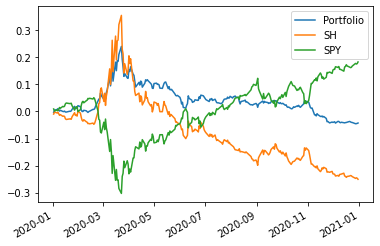

In [65]:
((1+test.loc["2020"]).cumprod()-1).plot()

In [59]:
test.corr()

,Portfolio,SH,SPY
Portfolio,1.000000,0.837537,-0.835769
SH,0.837537,1.000000,-0.998070
SPY,-0.835769,-0.998070,1.000000


<AxesSubplot:>

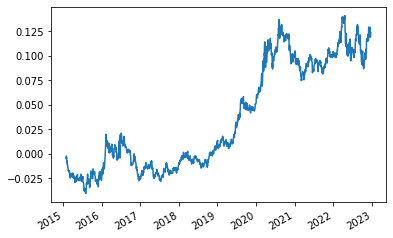

In [60]:
w_1 = [0.7,0.3]
tt = test[['Portfolio','SPY']] @ w_1
((1+tt).cumprod()-1).plot()

In [61]:
test

,Portfolio,SH,SPY
2015-02-02,-0.008865,-0.011172,0.012384
2015-02-03,-0.010192,-0.014911,0.014461
2015-02-04,0.004428,0.004128,-0.003808
2015-02-05,-0.005863,-0.011420,0.010095
2015-02-06,-0.005358,0.003233,-0.002765
...,...,...,...
2022-12-14,0.003410,0.005871,-0.006394
2022-12-15,-0.000624,0.025940,-0.024462
2022-12-16,0.005773,0.012010,-0.016323
2022-12-19,0.003256,0.008745,-0.008480


<AxesSubplot:>

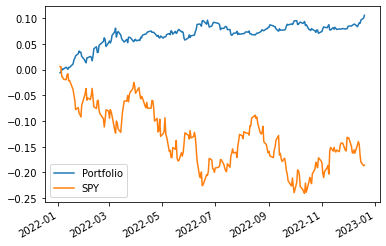

In [62]:
((1+test[['Portfolio', 'SPY']].loc["2022"]).cumprod()-1).plot()